In [2]:
!python --version
import tensorflow as tf
print(tf.__version__)

Python 3.9.13
2.11.0


In [3]:
!pip install --upgrade keras_applications


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Input, Lambda
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
tf.keras.applications.resnet.preprocess_input
from keras.applications.densenet import DenseNet201
from keras.applications.densenet import DenseNet121
tf.keras.applications.densenet.preprocess_input
from keras.applications.mobilenet_v3 import MobileNetV3Small
from keras.applications.mobilenet_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix
from keras.layers import Dropout
from keras.models import Model
from tensorflow.keras import regularizers
import itertools
import os
import shutil
import random
from glob import glob
import matplotlib.pyplot as plt
import warnings
import PIL
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import measure



In [5]:
train_path= "/Users/aishu/Alzheimer_s Dataset/train"
test_path=  "/Users/aishu/Alzheimer_s Dataset/test"

In [6]:
IMAGE_SIZE = [224, 224]

In [7]:
train_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=train_path, target_size=IMAGE_SIZE, classes=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], batch_size=64)

test_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=test_path, target_size=IMAGE_SIZE, classes=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], batch_size=64, shuffle=False)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet',include_top=False)   ## Main Code Import

In [9]:
# don't train existing weights  # Dont run this for now    #PLease run this line  #Running this cell will take our image weight
for layer in vgg.layers:
  layer.trainable = False

In [10]:
folders = glob("/Users/aishu/Alzheimer_s Dataset/train/*")
(folders)

['/Users/aishu/Alzheimer_s Dataset/train\\MildDemented',
 '/Users/aishu/Alzheimer_s Dataset/train\\ModerateDemented',
 '/Users/aishu/Alzheimer_s Dataset/train\\NonDemented',
 '/Users/aishu/Alzheimer_s Dataset/train\\VeryMildDemented']

In [11]:
# our layers - you can add more if you want skip permanently
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [12]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
#prediction = Dense(len(folders), activation='softmax')(x)
prediction = Dense(len(folders), activation='softmax',kernel_regularizer=regularizers.L2(0.001))(x)

In [13]:
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
#either1 optimiser
opt = Adam(learning_rate=0.001)    #0.001 #0.0001 #0.00001 #Adam #SGD
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)


In [16]:
r = model.fit(
  x=train_batches,
  validation_data=test_batches,
  epochs=10,
  steps_per_epoch=len(train_batches)
)

Epoch 1/10
81/81 [==============================] - 1912s 24s/step - loss: 1.2000 - accuracy: 0.5421 - val_loss: 0.9252 - val_accuracy: 0.6052
Epoch 2/10
81/81 [==============================] - 1763s 22s/step - loss: 0.8191 - accuracy: 0.6372 - val_loss: 0.8971 - val_accuracy: 0.5942
Epoch 3/10
81/81 [==============================] - 1620s 20s/step - loss: 0.6286 - accuracy: 0.7452 - val_loss: 0.7960 - val_accuracy: 0.6458
Epoch 4/10
81/81 [==============================] - 1597s 20s/step - loss: 0.5476 - accuracy: 0.7850 - val_loss: 0.7725 - val_accuracy: 0.6505
Epoch 5/10
81/81 [==============================] - 1616s 20s/step - loss: 0.5332 - accuracy: 0.7868 - val_loss: 0.8327 - val_accuracy: 0.6364
Epoch 6/10
81/81 [==============================] - 1553s 19s/step - loss: 0.5425 - accuracy: 0.7955 - val_loss: 1.4158 - val_accuracy: 0.4934
Epoch 7/10
81/81 [==============================] - 1505s 19s/step - loss: 0.4857 - accuracy: 0.8202 - val_loss: 0.7771 - val_accuracy: 0.6771

In [26]:
score = model.evaluate(test_batches,verbose=0)
print('Test Loss: ',score[0])
print('Test accuracy: ',score[1])
print(score)

Test Loss:  0.7316645383834839
Test accuracy:  0.6903831362724304
[0.7316645383834839, 0.6903831362724304]


In [27]:
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('Train_Test_loss')

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('Train_Test_acc')

In [30]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
np.round(predictions)
np.argmax(predictions, axis=-1)

array([0, 0, 0, ..., 2, 3, 3], dtype=int64)

Confusion matrix, without normalization
[[ 77   0  54  48]
 [  1   7   1   3]
 [ 25   0 476 139]
 [ 18   0 107 323]]


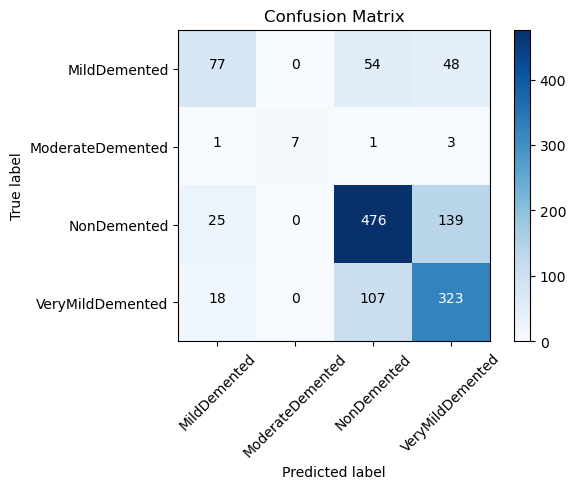

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

cm_plot_labels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [32]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

macro_roc_auc_ovo = roc_auc_score(test_batches.classes, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    test_batches.classes, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(test_batches.classes, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    test_batches.classes, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.889139 (macro),
0.879604 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.890258 (macro),
0.848912 (weighted by prevalence)


In [33]:
from sklearn.metrics import f1_score
f1_score(test_batches.classes, np.argmax(predictions, axis=-1), average='weighted')

0.6869637619379259

In [34]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(test_batches.classes, np.argmax(predictions, axis=-1), average='weighted')

(0.6923184738018525, 0.6903831118060985, 0.6869637619379259, None)

In [35]:
pip install pyppeteer

     ---------------------------------------- 83.4/83.4 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


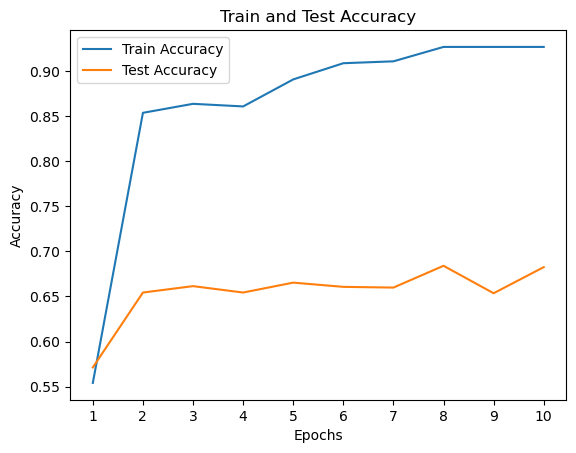

In [41]:
import matplotlib.pyplot as plt

# Train and test accuracy values from your code
train_accuracy = [0.5540, 0.8540, 0.8640, 0.8611, 0.89111, 0.9091, 0.9112, 0.9272, 0.9272, 0.9272]
test_accuracy_reversed = [0.5712, 0.6544, 0.6615, 0.6544, 0.6654, 0.6607, 0.6599, 0.6841, 0.6536, 0.6826]
epochs = range(1, 11)  # Assuming 10 epochs

# Plotting
plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, test_accuracy_reversed, label='Test Accuracy')

# Set axis labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')

# Set x-axis ticks to range from 1 to 10
plt.xticks(range(1, 11))

# Add legend
plt.legend()

# Show plot
plt.show()



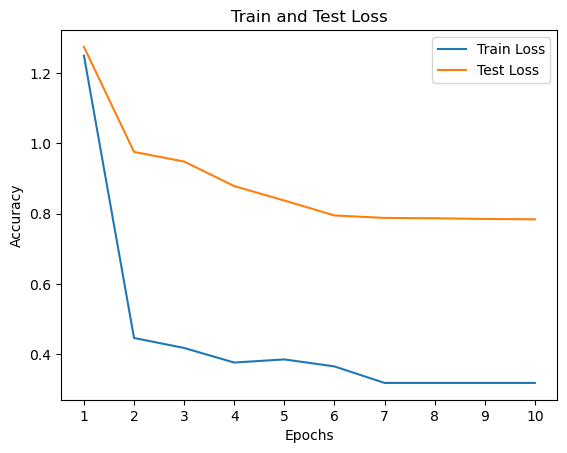

In [55]:
import matplotlib.pyplot as plt

# Train and test accuracy values from your code
train_loss = [1.250, 0.446, 0.4175, 0.376, 0.385, 0.365, 0.318, 0.318, 0.318, 0.318]
test_loss = [1.275, 0.976, 0.9485, 0.8786, 0.8375, 0.795, 0.788, 0.787, 0.785, 0.784]
epochs = range(1, 11)  # Assuming 10 epochs

# Plotting
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')

# Set axis labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Loss')

# Set x-axis ticks to range from 1 to 10
plt.xticks(range(1, 11))

# Add legend
plt.legend()

# Show plot
plt.show()